In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature



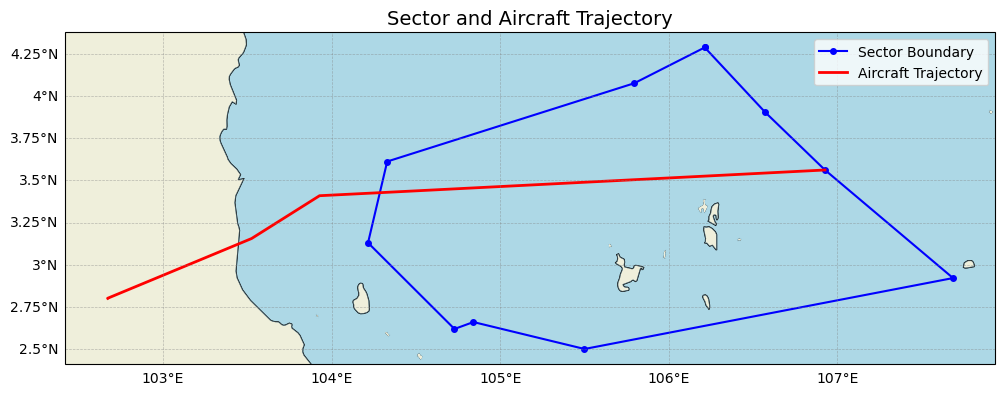

In [32]:


# Load the sector data
sector_data = pd.read_csv('sector6coords.csv', header=None, names=['latitude', 'longitude'])
trajectory_data = pd.read_csv('aircraft_trajectories/SQ19_B744_trajectory.csv')

sector_lat = sector_data.iloc[:, 0]
sector_lon = sector_data.iloc[:, 1]
trajectory_lat = trajectory_data['latitude']
trajectory_lon = trajectory_data['longitude']

# Plot the data
plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features for better context
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='--', linewidth=0.5)

# Plot the sector with enhanced visibility
ax.plot(sector_lon, sector_lat, '-o', color='blue', markersize=4, label='Sector Boundary', transform=ccrs.PlateCarree())

# Plot the trajectory with a distinct color and wider line
ax.plot(trajectory_lon, trajectory_lat, color='red', linewidth=2, label='Aircraft Trajectory', transform=ccrs.PlateCarree())

# Adjust map extent to focus on the data
extent_margin = 1000  # Add a margin around the data for better visibility
# min_lon = min(sector_lon.min(), trajectory_lon.min()) - extent_margin
# max_lon = max(sector_lon.max(), trajectory_lon.max()) + extent_margin
# min_lat = min(sector_lat.min(), trajectory_lat.min()) - extent_margin
# max_lat = max(sector_lat.max(), trajectory_lat.max()) + extent_margin
# ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
min_lon = sector_lon.min() - extent_margin
max_lon = sector_lon.max() + extent_margin
min_lat = sector_lat.min() - extent_margin
max_lat = sector_lat.max() + extent_margin
# Add gridlines and labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Add title and legend
plt.title('Sector and Aircraft Trajectory', fontsize=14)
plt.legend()

# Display the plot
plt.show()


In [21]:
df2 = pd.read_csv('merged_aircraft_airways2.csv')
df2.loc[0]['waypoints']

"[{'name': 'VMR', 'latitude': 2.388333333333333, 'longitude': 103.87166666666666}, {'name': 'LENDA', 'latitude': 7.0, 'longitude': 106.80944444444444}, {'name': 'LIPRO', 'latitude': 3.98, 'longitude': 105.26305555555555}, {'name': 'LEBIN', 'latitude': 1.33, 'longitude': 104.405}, {'name': 'ONAPO', 'latitude': 7.088888888888889, 'longitude': 108.15305555555557}, {'name': 'LUSMO', 'latitude': 3.5613888888888887, 'longitude': 106.92611111111111}]"

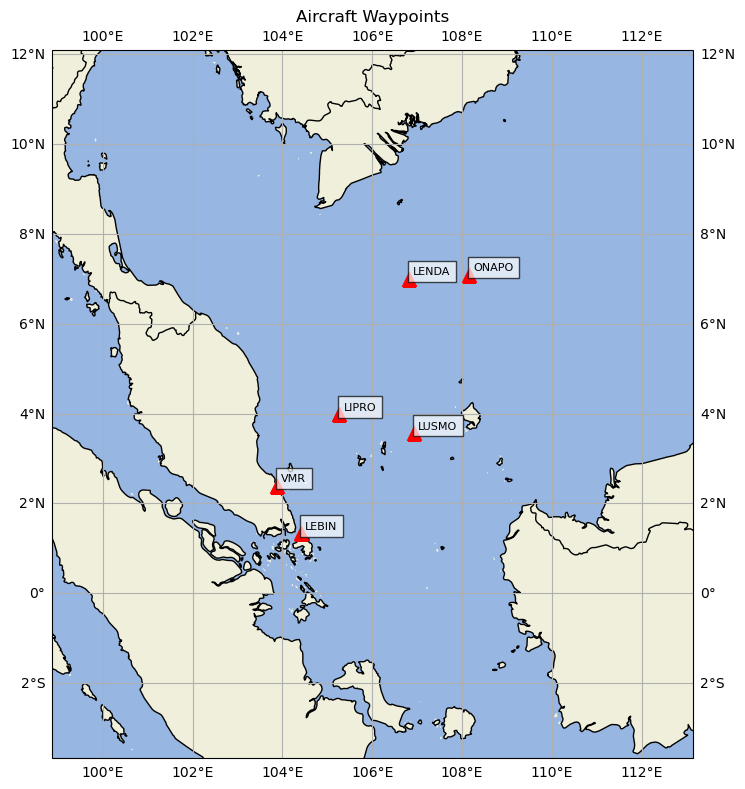

In [23]:
import ast
# Convert string representation of waypoints to list of dicts
waypoints = ast.literal_eval(df2.loc[0]['waypoints'])

# Extract coordinates
lats = [point['latitude'] for point in waypoints]
lons = [point['longitude'] for point in waypoints]
names = [point['name'] for point in waypoints]

# Create figure and axis with projection
fig, ax = plt.subplots(figsize=(12, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

# Set map extent (with some padding)
ax.set_extent([min(lons)-5, max(lons)+5, 
               min(lats)-5, max(lats)+5], 
              crs=ccrs.PlateCarree())

# Plot waypoints
ax.scatter(lons, lats, c='red', marker='^', s=100, 
          transform=ccrs.PlateCarree(), zorder=3)

# Add labels
for name, lon, lat in zip(names, lons, lats):
    ax.text(lon+0.1, lat+0.1, name, transform=ccrs.PlateCarree(),
            fontsize=8, bbox=dict(facecolor='white', alpha=0.7))

# Add gridlines
ax.gridlines(draw_labels=True)

plt.title('Aircraft Waypoints')
plt.tight_layout()
plt.show()

In [27]:
trajectory_data

,timestamp,latitude,longitude,altitude,waypoint_segment,segment_distance_nm,distance_in_segment_nm,cumulative_distance_nm,total_route_distance_nm
0,300,2.388333,103.871667,39637.0,VMR-LENDA,50.08,0.00,0.00,196.22
1,310,2.394253,103.886925,39274.0,VMR-LENDA,50.08,0.98,0.98,196.22
2,320,2.400172,103.902183,38911.0,VMR-LENDA,50.08,1.96,1.96,196.22
3,330,2.406091,103.917441,38548.0,VMR-LENDA,50.08,2.95,2.95,196.22
4,340,2.412010,103.932700,38185.0,VMR-LENDA,50.08,3.93,3.93,196.22
...,...,...,...,...,...,...,...,...,...
201,2310,3.543282,106.879978,35000.0,ONAPO-LUSMO,34.66,31.69,193.25,196.22
202,2320,3.549318,106.895355,35000.0,ONAPO-LUSMO,34.66,32.68,194.24,196.22
203,2330,3.555353,106.910733,35000.0,ONAPO-LUSMO,34.66,33.67,195.23,196.22
204,2340,3.561389,106.926111,35000.0,ONAPO-LUSMO,34.66,34.66,196.22,196.22


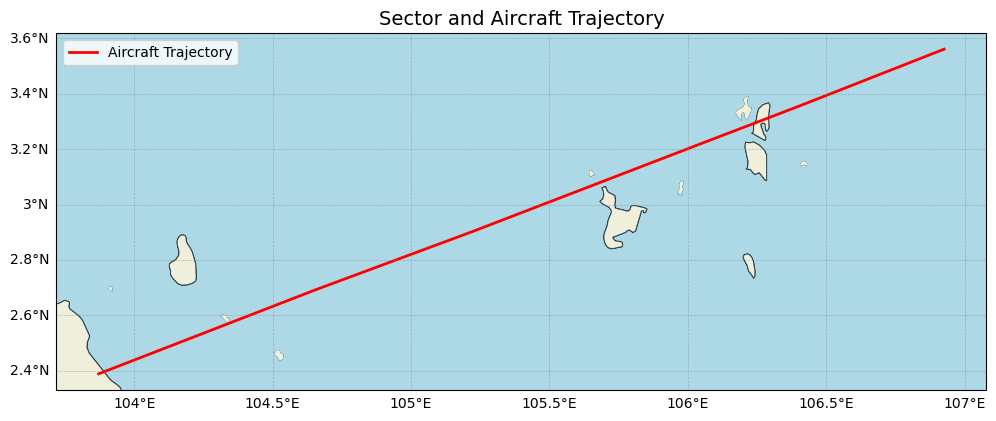

In [28]:
plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features for better context
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='--', linewidth=0.5)

# Plot the sector with enhanced visibility
# ax.plot(sector_lon, sector_lat, '-o', color='blue', markersize=4, label='Sector Boundary', transform=ccrs.PlateCarree())

# Plot the trajectory with a distinct color and wider line
ax.plot(trajectory_lon, trajectory_lat, color='red', linewidth=2, label='Aircraft Trajectory', transform=ccrs.PlateCarree())

# Adjust map extent to focus on the data
extent_margin = 1000  # Add a margin around the data for better visibility
# min_lon = min(sector_lon.min(), trajectory_lon.min()) - extent_margin
# max_lon = max(sector_lon.max(), trajectory_lon.max()) + extent_margin
# min_lat = min(sector_lat.min(), trajectory_lat.min()) - extent_margin
# max_lat = max(sector_lat.max(), trajectory_lat.max()) + extent_margin
# ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
min_lon = trajectory_lon.min() - extent_margin
max_lon = trajectory_lon.max() + extent_margin
min_lat = trajectory_lat.min() - extent_margin
max_lat = trajectory_lat.max() + extent_margin
# Add gridlines and labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Add title and legend
plt.title('Sector and Aircraft Trajectory', fontsize=14)
plt.legend()

# Display the plot
plt.show()
